In [3]:
# Data Import and Cleaning:
# Convert dates and other relevant fields to appropriate formats.

import pandas as pd

# Load the Airplane Crashes dataset
df = pd.read_csv('AAPL, 1D 01012007-12072023.csv')

# columns:
'volume' # - number of shares traded
'vwap' # - Volume-weighted average price
'open'
'close'
'high'
'low'
'time'
'transactions'
# The 'Open' and 'Close' prices denote the commencement and conclusion trading levels.
# while 'High' and 'Low' indicate the peak and trough prices in that interval.

result = (df['time'][2] - df['time'][1]) / (24 * 3600)
print(result)
# if you do the math, you can see that the result is 1
# so the time difference between every row is actually the number of seconds per one day.
# so these are timestamps.

# Convert the timestamps to datetime
df['datetime'] = pd.to_datetime(df['time'], unit='s')
# Set the datetime as the index for time series analysis
df.set_index('datetime', inplace=True)

# every row represents a different day
# the frequency is one row per day

# create a new column - 'year' - which is the year of every row - this will make the calculations easier
df['year'] = df.index.year

df


1.0


,volume,vwap,open,close,high,low,time,transactions,year
datetime,,,,,,,,,
2007-01-03 05:00:00,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,1167800400,189737,2007
2007-01-04 05:00:00,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,1167886800,136333,2007
2007-01-05 05:00:00,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,1167973200,141050,2007
2007-01-08 05:00:00,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,1168232400,130547,2007
2007-01-09 05:00:00,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,1168318800,569578,2007
...,...,...,...,...,...,...,...,...,...
2023-07-06 04:00:00,4.515552e+07,190.8214,189.8400,191.8100,192.0200,189.2000,1688616000,562755,2023
2023-07-07 04:00:00,4.675750e+07,191.4218,191.4100,190.6800,192.6700,190.2400,1688702400,538826,2023
2023-07-10 04:00:00,5.991216e+07,188.3628,189.2600,188.6100,189.9900,187.0350,1688961600,736912,2023


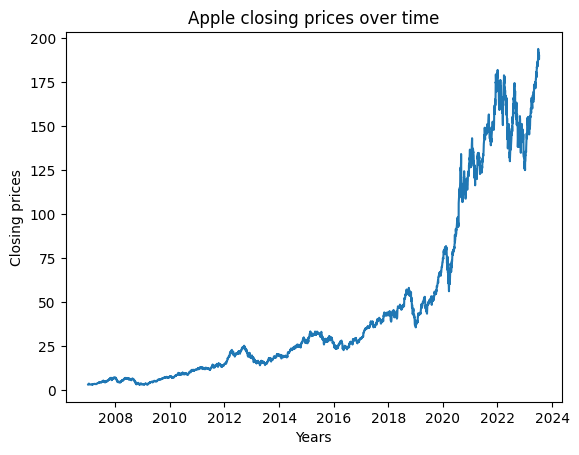

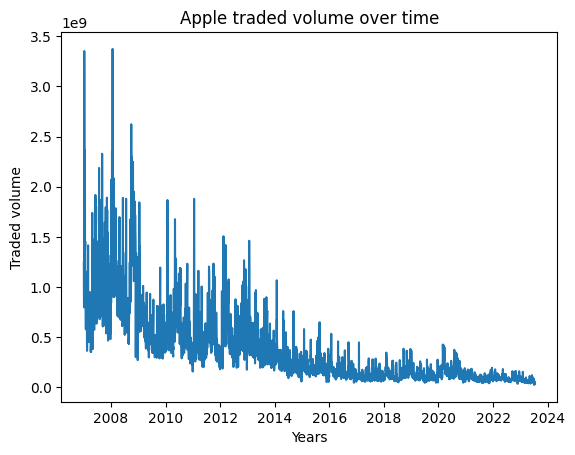

In [4]:
# Utilize Matplotlib to plot closing prices and traded volume over time.

import matplotlib.pyplot as plt

# plot the closing prices
plt.plot(df.index, df['close'])
plt.title('Apple closing prices over time')
plt.xlabel('Years')
plt.ylabel('Closing prices')
plt.show()

# plot the traded volume
plt.plot(df.index, df['volume'])
plt.title('Apple traded volume over time')
plt.xlabel('Years')
plt.ylabel('Traded volume')
plt.show()


In [6]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.1 MB/s eta 0:00:00


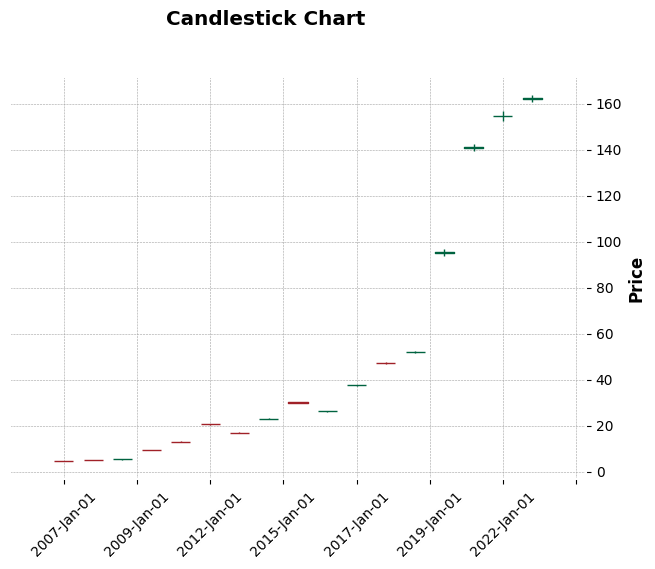

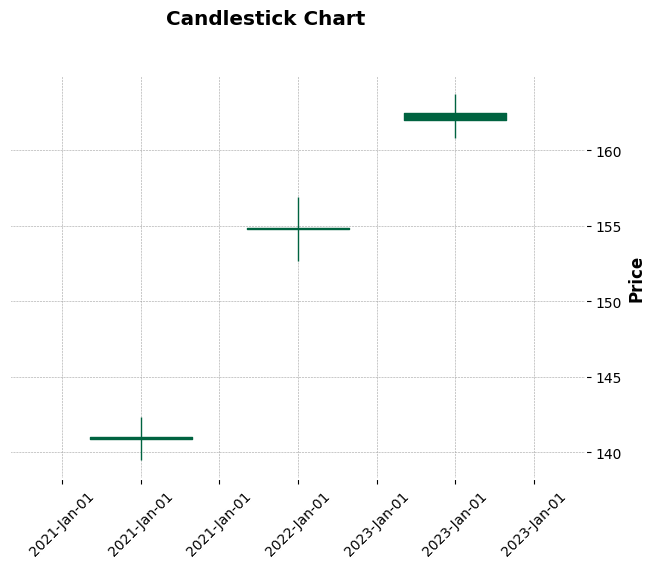

In [7]:
# Create a candlestick chart to depict high and low prices.

import mplfinance as mpf
import pandas as pd

# create a new Dataframe, with mean values of all prices, grouped by year
grouped_mean_values = df.groupby(df.index.year)['open'].mean()
grouped_mean_values = grouped_mean_values.to_frame()
grouped_mean_values['close'] = df.groupby(df.index.year)['close'].mean()
grouped_mean_values['high'] = df.groupby(df.index.year)['high'].mean()
grouped_mean_values['low'] = df.groupby(df.index.year)['low'].mean()

# convert the  index date to datetime
grouped_mean_values.index = pd.to_datetime(grouped_mean_values.index, format="%Y")

# Plot the candlestick chart
mpf.plot(grouped_mean_values, type='candle', style='charles', title='Candlestick Chart', ylabel='Price')

# but because there are so many values, lets draw only the last 3 years
mpf.plot(grouped_mean_values.loc['2021-01-01':'2023-01-01'], type='candle', style='charles', title='Candlestick Chart', ylabel='Price')


In [8]:
#  compute summary statistics (mean, median, standard deviation) for key columns.

# for example:
open_price_median_over_all_years = df['open'].median()
close_price_STD_over_all_years = df['close'].std()

print(open_price_median_over_all_years)
print(close_price_STD_over_all_years)

# and so on ....

# we can also groupby, as we saw in the previous section ...

25.775
50.293482384840615


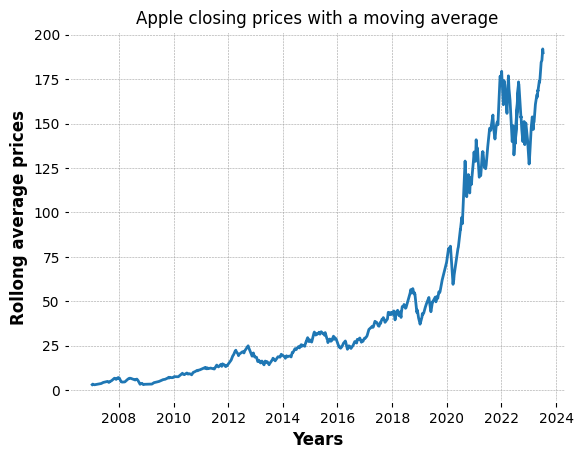

In [9]:
# Analyze closing prices with a moving average.
# A window of 5 days.
df['rolling_close'] = df['close'].rolling(window=5).mean()

df

# plot the closing prices with a moving average.
plt.plot(df.index, df['rolling_close'])
plt.title('Apple closing prices with a moving average')
plt.xlabel('Years')
plt.ylabel('Rollong average prices')
plt.show()


In [10]:
# Execute a t-test to compare average closing prices across different years.

from scipy import stats

# we choose the closing prices of year 2010 and 2015 for example
t_stat, p_value = stats.ttest_ind(df[df['year']==2010]['close'], df[df['year']==2015]['close'])
print(f"t_stat = {t_stat}\np_value = {p_value}")

# the number of items in each group
n1 = len(df[df['year']==2010]['close'])
n2 = len(df[df['year']==2015]['close'])

# Calculate the degrees of freedom
DF = n1+n2 -2

# Critical p_value for two-tailed test, alpha = 0.05
alpha = 0.05
p_value = stats.t.ppf(1 - alpha/2, DF)
print(f"critical value = {p_value}")

# if p-value is < 0.05, we reject the null hypothesis (H0).
# This will indicate a significant difference in mean capacity.

t_stat = -140.45475470671187
p_value = 0.0
critical value = 1.9647008448830137


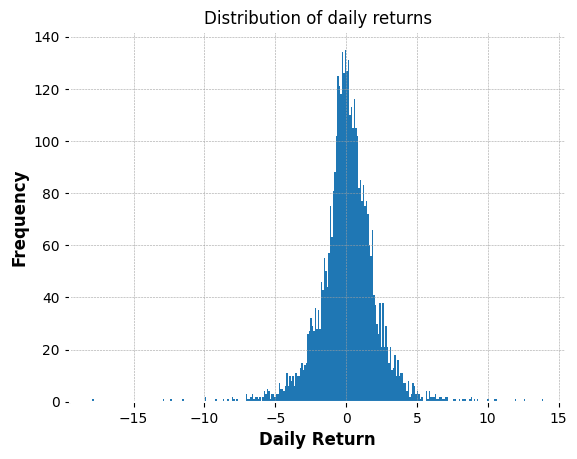

In [11]:
# we use a numpy function, for calculating the daily return percentage, on the "close" column
# this will create a new column
df['daily_return'] = df['close'].pct_change() * 100

df

# plot it
plt.hist(df['daily_return'], bins=300)
plt.title('Distribution of daily returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [12]:
# Now, how do I check using SciPy that it's indeed a normal distribution ?
# I checked on the internet.
# There's something called the Shapiro-Wilk test.

# Perform the Shapiro-Wilk test
shapiro_stat, shapiro_p_value = stats.shapiro(df['daily_return'].dropna())

print(f"Shapiro-Wilk test statistic: {shapiro_stat}")
print(f"Shapiro-Wilk test p-value: {shapiro_p_value}")

# The null hypothesis is that it is a normal distribution.

# checking the results
if shapiro_p_value > 0.05:
    print("The data follows a normal distribution (fail to reject the null hypothesis).")
else:
    print("The data does not follow a normal distribution (reject the null hypothesis).")

# I don't know why, but the results show that it isn't a normal distribution, although it is.
# It probably has something to do with the amount of sample data (it's too large).


Shapiro-Wilk test statistic: 0.9406660768556715
Shapiro-Wilk test p-value: 6.180858977994113e-38
The data does not follow a normal distribution (reject the null hypothesis).
